In [4]:
# !pip install pandas



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
sheet_url = "https://docs.google.com/spreadsheets/d/13t8DmrgmXxOID0lqh2Rsf4uhcftpkB0CMvzZPFNCV_U/export?format=csv"
df = pd.read_csv(sheet_url)
df.head()


pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1  2015-01-01   11:57:40   
2         3         2  five_cheese_l         1  2015-01-01   11:57:40   
3         4         2    ital_supr_l         1  2015-01-01   11:57:40   
4         5         2     mexicana_m         1  2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

In [12]:
# Check how many rows were completely empty before cleaning
df_raw = pd.read_csv(sheet_url)  # or re-load your raw file
empty_rows = df_raw[df_raw.isnull().all(axis=1)]
print("Empty rows BEFORE cleaning:", len(empty_rows))

Empty rows BEFORE cleaning: 0


In [15]:
df.dropna(how='all', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()



pizza_id  order_id  pizza_name_id  quantity  order_date order_time  \
0         1         1     hawaiian_m         1  2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1  2015-01-01   11:57:40   
2         3         2  five_cheese_l         1  2015-01-01   11:57:40   
3         4         2    ital_supr_l         1  2015-01-01   11:57:40   
4         5         2     mexicana_m         1  2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name  
0         The Hawaiian Pizza  
1   The Classic Deluxe Pizza  
2      The Five Cheese Pizza  
3  The Italian Supreme Pizza  
4         The Mexicana Pizza

In [16]:
print(df.columns)

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')


In [18]:
# Convert to datetime format
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Check if it worked
df['order_date'].head()


0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: order_date, dtype: datetime64[ns]

In [23]:
df['Month'] = df['order_date'].dt.month_name()
df['Weekday'] = df['order_date'].dt.day_name()
df['Hour'] = df['order_date'].dt.hour
df['Year'] = df['order_date'].dt.year
df.head()


pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name    Month   Weekday  Hour  Year  
0         The Hawaiian Pizza  January  Thursday     0  2015  
1   The Classic Deluxe Pizza  January  Thursday     0  2015  
2      The Five Cheese Pizza  January  Thursday     0  2015  
3  The Italian Supreme Pizza  January  Thursday     0  2015  
4         The Mexicana Pizza  January  Thursday     0  2015

In [27]:
df['order_time'] = pd.to_datetime(df['order_time'], format='%H:%M:%S', errors='coerce').dt.time
df.head()
# df.info(



pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name    Month   Weekday  Hour  Year  
0         The Hawaiian Pizza  January  Thursday     0  2015  
1   The Classic Deluxe Pizza  January  Thursday     0  2015  
2      The Five Cheese Pizza  January  Thursday     0  2015  
3  The Italian Supreme Pizza  January  Thursday     0  2015  
4         The Mexicana Pizza  January  Thursday     0  2015

In [29]:
df['pizza_size'] = df['pizza_size'].str.strip().str.upper()
df['pizza_category'] = df['pizza_category'].str.strip().str.title()
df['pizza_name'] = df['pizza_name'].str.strip().str.title()
df.head()


pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   

                  pizza_name    Month   Weekday  Hour  Year  
0         The Hawaiian Pizza  January  Thursday     0  2015  
1   The Classic Deluxe Pizza  January  Thursday     0  2015  
2      The Five Cheese Pizza  January  Thursday     0  2015  
3  The Italian Supreme Pizza  January  Thursday     0  2015  
4         The Mexicana Pizza  January  Thursday     0  2015

In [30]:
df.info()
df.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
 12  Month              48620 non-null  object        
 13  Weekday            48620 non-null  object        
 14  Hour  

pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
2         3         2  five_cheese_l         1 2015-01-01   11:57:40   
3         4         2    ital_supr_l         1 2015-01-01   11:57:40   
4         5         2     mexicana_m         1 2015-01-01   11:57:40   
5         6         2     thai_ckn_l         1 2015-01-01   11:57:40   
6         7         3    ital_supr_m         1 2015-01-01   12:12:28   
7         8         3   prsc_argla_l         1 2015-01-01   12:12:28   
8         9         4    ital_supr_m         1 2015-01-01   12:16:31   
9        10         5    ital_supr_m         1 2015-01-01   12:21:30   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       16.00        16.00          M        Classic   
2       18.50        18.50          L         Veggie   
3       20.75        20.75          L        Supreme   
4       16.00        16.00          M         Veggie   
5       20.75        20.75          L        Chicken   
6       16.50        16.50          M        Supreme   
7       20.75        20.75          L        Supreme   
8       16.50        16.50          M        Supreme   
9       16.50        16.50          M        Supreme   

                                   pizza_ingredients  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1  Pepperoni, Mushrooms, Red Onions, Red Peppers,...   
2  Mozzarella Cheese, Provolone Cheese, Smoked Go...   
3  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
4  Tomatoes, Red Peppers, Jalapeno Peppers, Red O...   
5  Chicken, Pineapple, Tomatoes, Red Peppers, Tha...   
6  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
7  Prosciutto di San Daniele, Arugula, Mozzarella...   
8  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   
9  Calabrese Salami, Capocollo, Tomatoes, Red Oni...   

                         pizza_name    Month   Weekday  Hour  Year  
0                The Hawaiian Pizza  January  Thursday     0  2015  
1          The Classic Deluxe Pizza  January  Thursday     0  2015  
2             The Five Cheese Pizza  January  Thursday     0  2015  
3         The Italian Supreme Pizza  January  Thursday     0  2015  
4                The Mexicana Pizza  January  Thursday     0  2015  
5            The Thai Chicken Pizza  January  Thursday     0  2015  
6         The Italian Supreme Pizza  January  Thursday     0  2015  
7  The Prosciutto And Arugula Pizza  January  Thursday     0  2015  
8         The Italian Supreme Pizza  January  Thursday     0  2015  
9         The Italian Supreme Pizza  January  Thursday     0  2015

In [31]:
df.to_csv("dominos_cleaned.csv", index=False)


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# For better looking charts (optional)
sns.set(style="whitegrid")


Index(['The Classic Deluxe Pizza', 'The Barbecue Chicken Pizza',
       'The Hawaiian Pizza', 'The Pepperoni Pizza', 'The Thai Chicken Pizza',
       'The California Chicken Pizza', 'The Sicilian Pizza',
       'The Spicy Italian Pizza', 'The Southwest Chicken Pizza',
       'The Big Meat Pizza'],
      dtype='object', name='pizza_name')
[2453 2432 2422 2418 2371 2370 1938 1924 1917 1914]


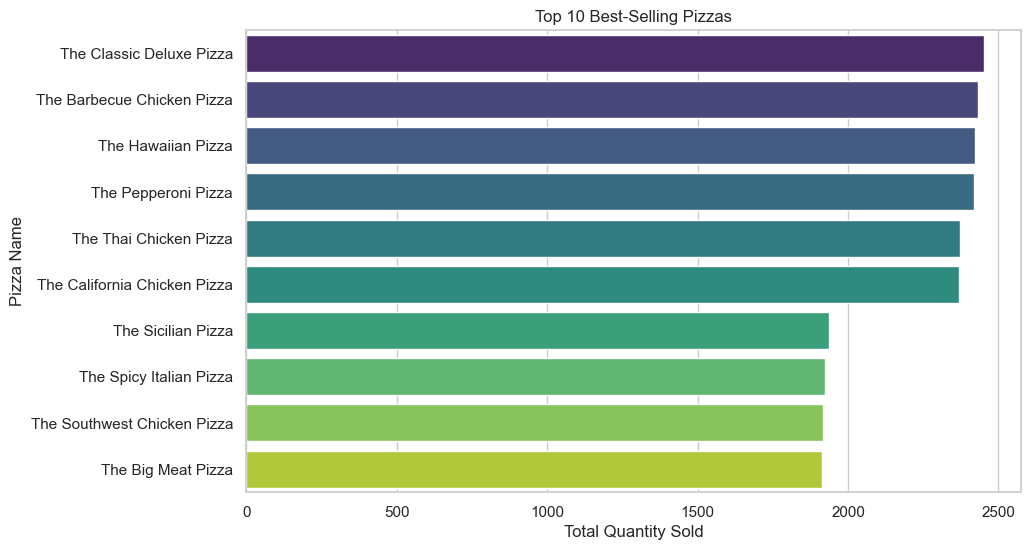

In [41]:
top_10_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)
top_10_pizzas.head(10)
print(top_10_pizzas.index)
print(top_10_pizzas.values)
# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_pizzas.values, y=top_10_pizzas.index, palette="viridis", hue=top_10_pizzas.index)
plt.title('Top 10 Best-Selling Pizzas')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()


pizza_category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64


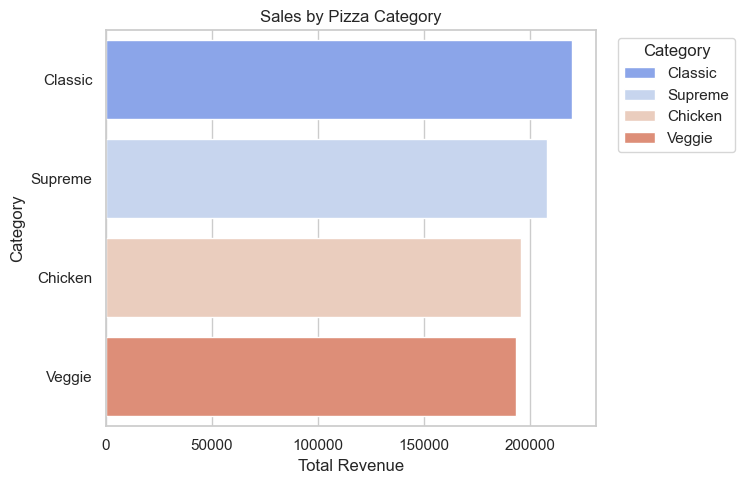

In [45]:
category_sales = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)
print(category_sales)
# Plotting
plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="coolwarm", hue = category_sales.index, legend = True )
plt.title('Sales by Pizza Category')
plt.xlabel('Total Revenue')
plt.ylabel('Category')


plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.tight_layout()  # Adjust layout
plt.show()


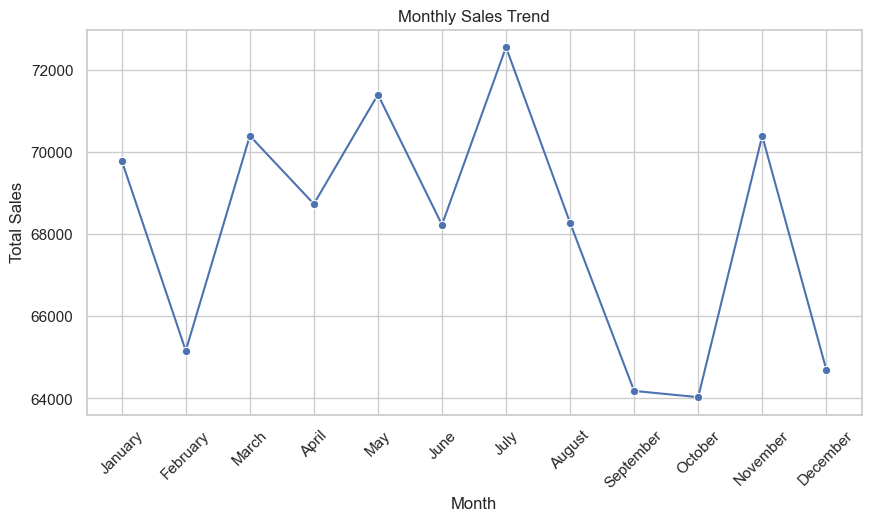

In [47]:
monthly_sales = df.groupby('Month')['total_price'].sum()
# print(monthly_sales)
# Sort months manually (to fix alphabetic issue)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)
# print(monthly_sales)
# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()


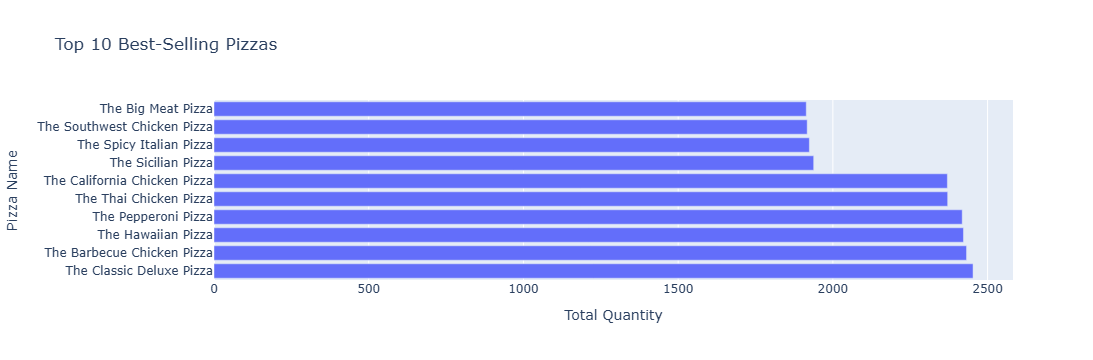

In [52]:
import plotly.express as px

top_10_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for Plotly
pizza_df = top_10_pizzas.reset_index()

fig = px.bar(
    pizza_df,
    x='quantity',
    y='pizza_name',
    orientation='h',
    title='Top 10 Best-Selling Pizzas',
    labels={'quantity': 'Total Quantity', 'pizza_name': 'Pizza Name'}
)

fig.show()



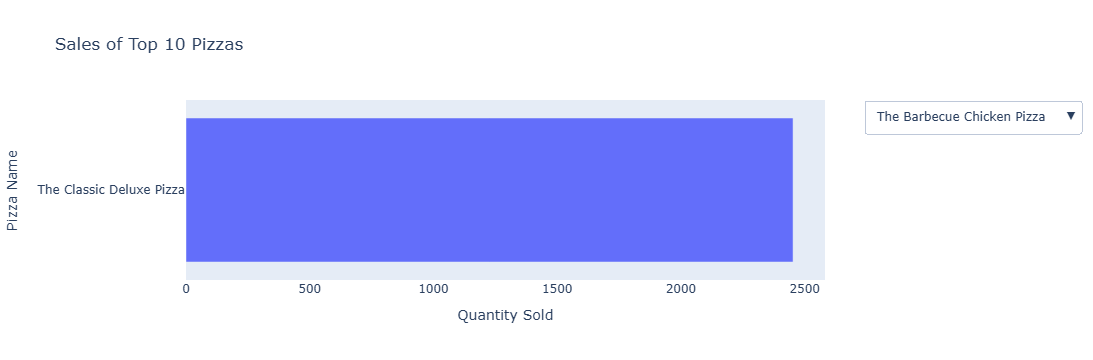

In [92]:
import plotly.graph_objects as go

# Step 1: Prepare data
top_10_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=False).head(10)
pizza_df = top_10_pizzas.reset_index()

# Step 2: Create one bar trace per pizza, but show only the first one
fig = go.Figure()

for i, row in pizza_df.iterrows():
    fig.add_trace(go.Bar(
        x=[row['quantity']],
        y=[row['pizza_name']],
        name=row['pizza_name'],
        orientation='h',
        visible=(i == 0)  # Only show the first pizza at first
    ))

# Step 3: Create dropdown buttons
buttons = []
for i, pizza in enumerate(pizza_df['pizza_name']):
    visibility = [False] * len(pizza_df)
    visibility[i] = True
    buttons.append(dict(
        label=pizza,
        method='update',
        args=[{'visible': visibility},
             {'layout': {
                'title': {
                    'text': f"Sales of {pizza}",
                    'y': 1.95,         # Pushes title closer to top (default is ~0.9â€“1.0)
                    'yanchor': 'top',
                    'xanchor': 'center'
                }
            }}]
    ))

# Step 4: Update layout with dropdown
fig.update_layout(
    title='Sales of Top 10 Pizzas',
    xaxis_title='Quantity Sold',
    yaxis_title='Pizza Name',
    updatemenus=[dict(
        active=1,
        buttons=buttons,
        x=1.4,  # position to the right
        y=1,
        showactive=True
    )]
)

fig.show()


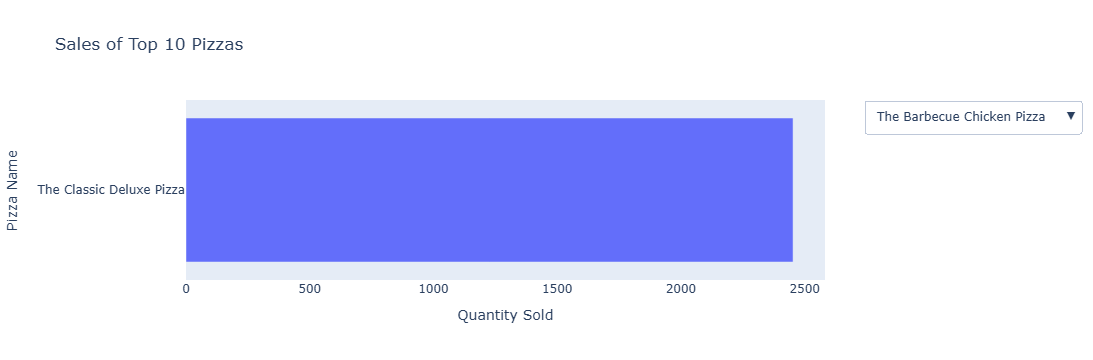

In [96]:
fig.show()

In [97]:
!pip install dash

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB 991.0 kB/s eta 0:00:08
    --------------------------------------- 0.1/7.9 MB 1.4 MB/s eta 0:00:06
   - -------------------------------------- 0.3/7.9 MB 2.0 MB/s eta 0:00:04
   - -------------------------------------- 0.4/7.9 MB 2.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.5/7.9 MB 2.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.7/7.9 MB 2.5 MB/s eta 0:00:03
   --- ------------------------------------ 0.7/7.9 MB 2.4 MB/s eta 0:00:04
   ---- ----------------------------------- 0.9/7.9 MB 2.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.0/7.9 MB 2.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/7.9 MB 2.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.3/7.9 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.4/7.9 MB 2.5 MB/s eta 0:00:03
   ------- ------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import dash
print(dash.__version__)


3.1.1
